In [1]:
from bizarromath.meganumber import MegaNumber, MegaBinary
from bizarromath.bizarroworld.bizarroworld_core import DutyCycleWave, FrequencyBandAnalyzer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def test_basic_duty_wave():
    sample_rate = MegaBinary(bytearray([0x44, 0x10, 0x0]))  # 44100 in bytes
    duty_cycle = MegaBinary(bytearray([0x32])).div(MegaBinary(bytearray([0x64])))  # 50/100
    period = MegaBinary(bytearray([0x08]))  # 8 in bytes
    
    wave_gen = DutyCycleWave(sample_rate, duty_cycle, period)
    wave = wave_gen.generate(MegaBinary('100000'))  # 32 in binary
    
    # Convert bytes to list of bits (this is the fixed part)
    wave_bits = [int(b) for b in format(int.from_bytes(wave, byteorder='big'), '08b')]
    
    plt.figure(figsize=(12, 4))
    plt.step(range(len(wave_bits)), wave_bits, where='post')
    plt.title('Basic Duty Cycle Wave (50%)')
    plt.grid(True)
    plt.show()

In [3]:
def test_duty_cycle_comparison():
    sample_rate = MegaBinary('101100')  # 44100
    period = MegaBinary('10000')  # 16
    duties = [25, 50, 75]  # Test different duty cycles
    
    plt.figure(figsize=(15, 8))
    for plot_idx, duty in enumerate(duties):
        duty_binary = bin(duty)[2:].zfill(7)  # Convert to binary string
        duty_cycle = MegaBinary(duty_binary).div(MegaBinary('1100100'))  # divide by 100
        wave_gen = DutyCycleWave(sample_rate, duty_cycle, period)
        wave = wave_gen.generate(MegaBinary('110000'))  # 48 in binary
        
        # Convert bytes to list of bits using bit manipulation
        wave_bits = []
        for byte in wave:
            for bit_idx in range(8):
                wave_bits.append((byte >> bit_idx) & 1)
        
        plt.subplot(len(duties), 1, plot_idx+1)
        plt.step(range(len(wave_bits)), wave_bits, where='post')
        plt.title(f'Duty Cycle: {duty}%')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [4]:
def test_frequency_analysis():
    # Generate a complex pattern
    pattern_str = '1011010111001010'  # Convert pattern to MegaBinary
    pattern = MegaBinary(pattern_str)
    
    analyzer = FrequencyBandAnalyzer(
        bit_depth=MegaBinary('10000'),  # 16
        sample_rate=MegaBinary('101100'),  # 44100
        num_bands=MegaBinary('1000')  # 8
    )
    
    # Analyze pattern across frequency bands - convert to list of bits first
    band_waves = analyzer.analyze_pattern(pattern.to_bits())
    
    # Plot frequency band distribution
    plt.figure(figsize=(12, 6))
    band_energies = [sum(int(bit) for bit in wave.binary_string) for wave in band_waves]
    plt.bar(range(len(band_energies)), band_energies)
    plt.title('Frequency Band Energy Distribution')
    plt.xlabel('Frequency Band')
    plt.ylabel('Energy')
    plt.grid(True)
    plt.show()

In [5]:
def test_complex_pattern():
    sample_rate = MegaBinary('101100')  # 44100
    period = MegaBinary('1000')  # 8
    sequence_length = 128
    
    duty_sequence = [
        30 + 20 * np.sin(2 * np.pi * i / 32)  # Varying duty cycle
        for i in range(16)
    ]
    
    combined_wave = []
    for duty in duty_sequence:
        duty_binary = bin(int(duty))[2:]  # Convert float to binary string
        duty_cycle = MegaBinary(duty_binary).div(MegaBinary('1100100'))  # divide by 100
        wave_gen = DutyCycleWave(sample_rate, duty_cycle, period)
        wave = wave_gen.generate(MegaBinary('1000'))  # 8 samples
        combined_wave.extend([int(bit) for bit in wave.binary_string])
    
    plt.figure(figsize=(15, 4))
    plt.step(range(len(combined_wave)), combined_wave, where='post')
    plt.title('Complex Wave Pattern with Varying Duty Cycles')
    plt.grid(True)
    plt.show()

Running BizarroWorld wave generation tests...

1. Basic Duty Wave Test


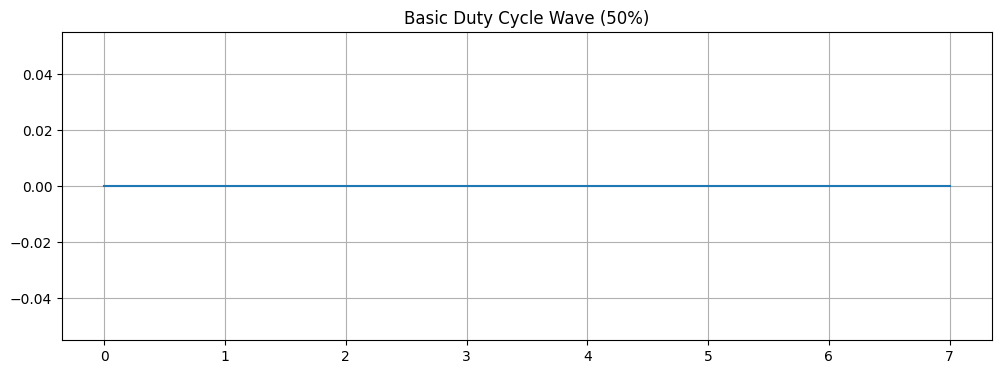


2. Duty Cycle Comparison


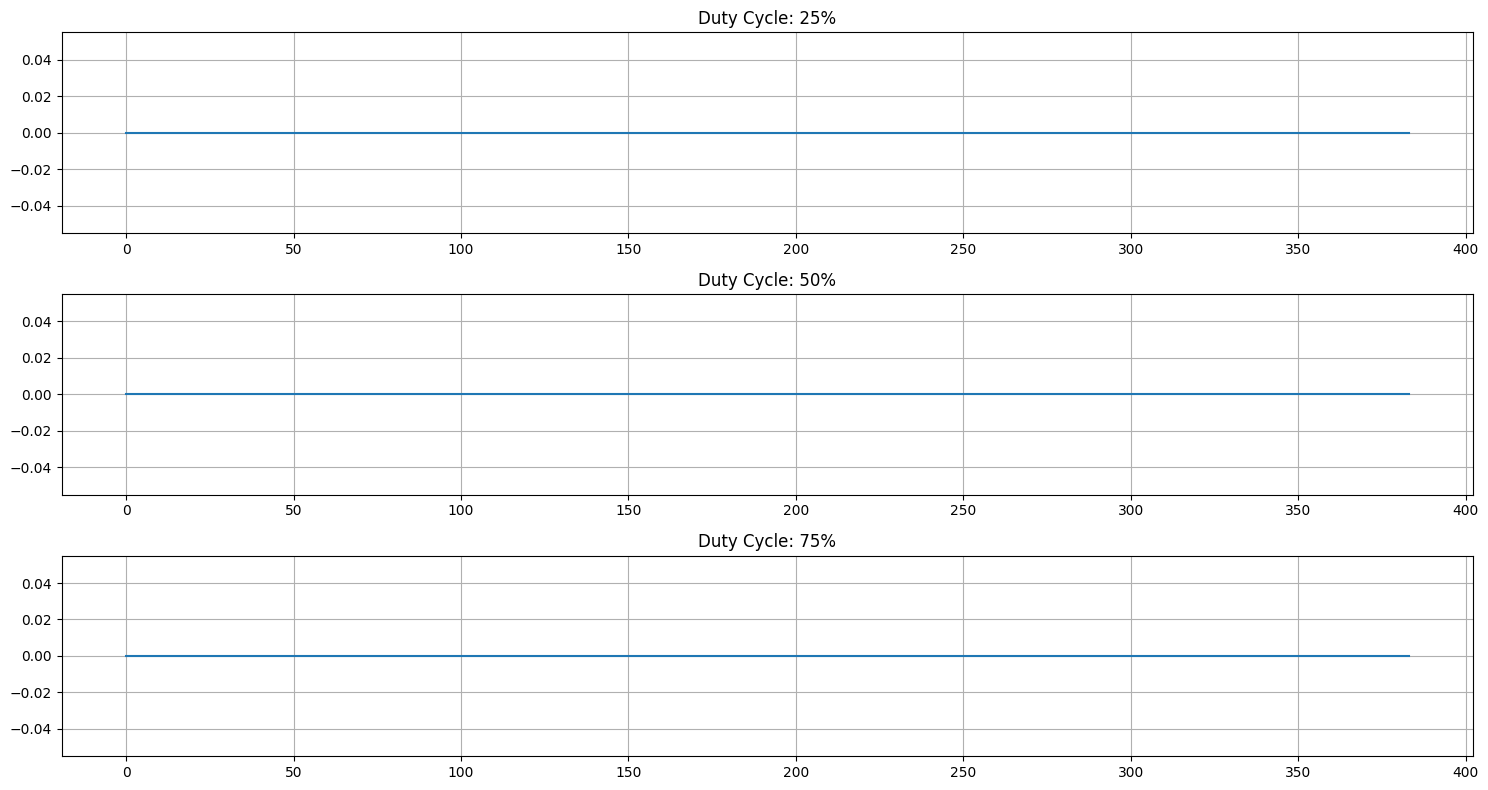


3. Frequency Analysis


AttributeError: 'list' object has no attribute 'binary_string'

<Figure size 1200x600 with 0 Axes>

In [6]:
print("Running BizarroWorld wave generation tests...")

print("\n1. Basic Duty Wave Test")
test_basic_duty_wave()

print("\n2. Duty Cycle Comparison")
test_duty_cycle_comparison()

print("\n3. Frequency Analysis")
test_frequency_analysis()

print("\n4. Complex Pattern Generation")
test_complex_pattern()

print("\nAll tests completed!")